In [158]:
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import itertools

In [159]:
RESULT_URL = "https://huggingface.co/henryscheible/experiment_results/raw/main/results_2022-12-29%2017%3A43%3A54.180109.json"

In [160]:
data = json.loads(requests.get(RESULT_URL).text)

In [161]:
data.keys()

dict_keys(['stereoset_binary_bert_classifieronly'])

In [162]:
checkpoints = list(data.keys())
suffix = "250"
suffixes = [suffix]

In [163]:
print(f"BASE STEREOTYPE SCORE: {data[checkpoints[0]][suffix]['base_ss']}")
print(f"BASE LANGUAGE MODELING SCORE: {data[checkpoints[0]][suffix]['base_lm']}")


BASE STEREOTYPE SCORE: 60.37515324470867
BASE LANGUAGE MODELING SCORE: 88.66634994409574


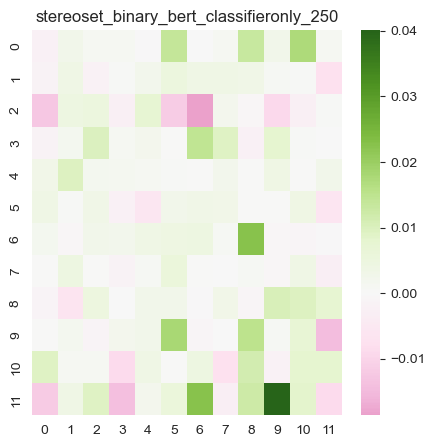

In [164]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    ax = fig.add_subplot(1, len(checkpoints),i+1)
    ax.set_title(f"{checkpoint}_{suffix}")
    sns.heatmap(np.array(data[checkpoint][suffix]["contribs"]).reshape(12, 12), ax=ax, cmap="PiYG", center=0)
plt.show()

     heads      variable      value
0        0  bottom_up_lm  30.754423
1        1  bottom_up_lm  62.627511
2        2  bottom_up_lm  62.764746
3        3  bottom_up_lm  44.566971
4        4  bottom_up_lm  46.637556
..     ...           ...        ...
285    140  bottom_up_ss  60.958622
286    141  bottom_up_ss  60.538924
287    142  bottom_up_ss  60.575658
288    143  bottom_up_ss  60.626422
289    144  bottom_up_ss  60.375153

[290 rows x 3 columns]


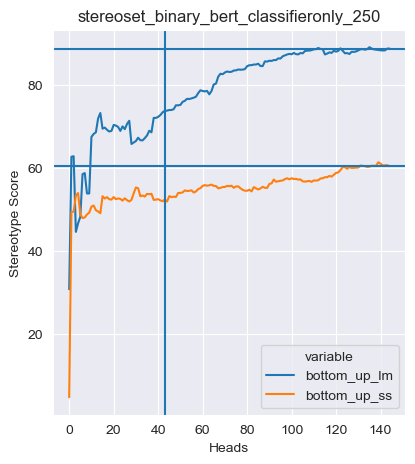

In [165]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(1, 2, 1)
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_lm': data[checkpoint][suffix]["bottom_up_lm"],
            'bottom_up_ss': data[checkpoint][suffix]["bottom_up_ss"],
        })
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()
        ss_hline = float(data[checkpoint][suffix]["base_ss"])
        lm_hline = float(data[checkpoint][suffix]["base_lm"])
        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df, ['heads']), ax=ax)
        print(pd.melt(df, ['heads']))
        ax.set(xlabel="Heads", ylabel="Stereotype Score")
        ax.axvline(vline, 0, 100)
        ax.axhline(ss_hline, 0, 144)
        ax.axhline(lm_hline, 0, 144)

plt.show()

     heads      variable      value
0        0  bottom_up_lm  30.754423
1        1  bottom_up_lm  62.627511
2        2  bottom_up_lm  62.764746
3        3  bottom_up_lm  44.566971
4        4  bottom_up_lm  46.637556
..     ...           ...        ...
720    140          icat  68.905044
721    141          icat  69.609418
722    142          icat  69.566717
723    143          icat  69.808204
724    144          icat  70.267811

[725 rows x 3 columns]


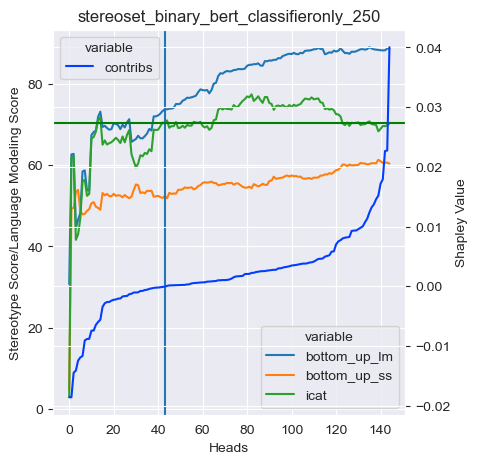

In [184]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(1, 2, 1)
        ss_hline = float(data[checkpoint][suffix]["base_ss"])
        lm_hline = float(data[checkpoint][suffix]["base_lm"])

        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_lm': data[checkpoint][suffix]["bottom_up_lm"],
            'bottom_up_ss': data[checkpoint][suffix]["bottom_up_ss"],
            'contribs': [list(np.sort(np.array(data[checkpoint][suffix]["contribs"])))[0]] + \
                list(np.sort(np.array(data[checkpoint][suffix]["contribs"])))
        })

        df['inverse_ss'] = 100 - df['bottom_up_ss']
        df['icat'] = df['bottom_up_lm'] * (df[['bottom_up_ss', 'inverse_ss']].min(axis=1)) / 50

        # df['bottom_up_lm'] = df['bottom_up_lm'] / lm_hline
        # df['bottom_up_ss'] = df['bottom_up_ss'] / ss_hline
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()

        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='value', hue='variable',
                    data=pd.melt(df[['heads', 'bottom_up_lm', 'bottom_up_ss', 'icat']], ['heads']), ax=ax)
        ax2 = ax.twinx()
        sns.lineplot(x='heads', y='value', hue='variable',
                     data=pd.melt(df[['heads', 'contribs']], ['heads']), ax=ax2, palette="bright")
        print(pd.melt(df, ['heads']))
        ax.set(xlabel="Heads", ylabel="Stereotype Score/Language Modeling Score")
        ax2.set(ylabel="Shapley Value")
        ax.axvline(vline, 0, 100)
        ax.axhline(df['icat'][144], 0, 144, color="green")

plt.show()

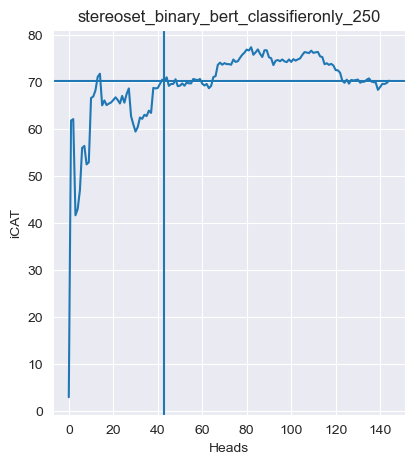

In [167]:
fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)
for i, checkpoint in enumerate(checkpoints):
    for j, suffix in enumerate(suffixes):
        ax = fig.add_subplot(1, 2, 1)
        ss_hline = float(data[checkpoint][suffix]["base_ss"])
        lm_hline = float(data[checkpoint][suffix]["base_lm"])
        df = pd.DataFrame({
            'heads': np.arange(145),
            'bottom_up_lm': data[checkpoint][suffix]["bottom_up_lm"],
            'bottom_up_ss': data[checkpoint][suffix]["bottom_up_ss"],
        })
        df['inverse_ss'] = 100 - df['bottom_up_ss']
        df['icat'] = df['bottom_up_lm'] * (df[['bottom_up_ss', 'inverse_ss']].min(axis=1)) / 50
        contribs = np.asarray(data[checkpoint][suffix]["contribs"])
        vline = (contribs < 0).sum()

        ax.set_title(f"{checkpoint}_{suffix}")
        sns.lineplot(x='heads', y='icat',
                    data=df[['heads', 'icat']], ax=ax)
        ax.set(xlabel="Heads", ylabel="iCAT")
        ax.axvline(vline, 0, 100)
        ax.axhline(df['icat'][144], 0, 144)

plt.show()